2024-01-01 22:44:39,659 - INFO - 
01_Download_Process_Speeches.ipynb...
2024-01-01 22:44:40,379 - INFO - El paquete NLTK 'stopwords' ya está instalado.
2024-01-01 22:44:40,381 - INFO - El paquete NLTK 'punkt' ya está instalado.
2024-01-01 22:44:40,476 - INFO - Iniciando descarga de archivos PDF...
2024-01-01 22:44:41,360 - INFO - Existing files skipped: ['Argentina_2022_Alberto_Fernandez.pdf', 'Argentina_2023_Javier_Milei.pdf', 'Colombia_2021_Ivan_Duque.pdf', 'Colombia_2022_Gustavo_Petro.pdf', 'Peru_2014_Ollanta_Humala.pdf', 'Peru_2015_Ollanta_Humala.pdf', 'Peru_2016_Pedro_Kuczynski.pdf', 'Peru_2017_Pedro_Kuczynski.pdf', 'Peru_2018_Martin_Vizcarra.pdf', 'Peru_2019_Martin_Vizcarra.pdf', 'Peru_2020_Martin_Vizcarra.pdf', 'Peru_2021_Pedro_Castillo.pdf', 'Peru_2022_Pedro_Castillo.pdf', 'Peru_2023_Dina_Boluarte.pdf']
2024-01-01 22:44:41,360 - INFO - Procesando archivos PDF y guardando textos...
2024-01-01 22:44:41,362 - INFO - Existing text files skipped: ['Argentina_2022_Alberto_Fernandez.t

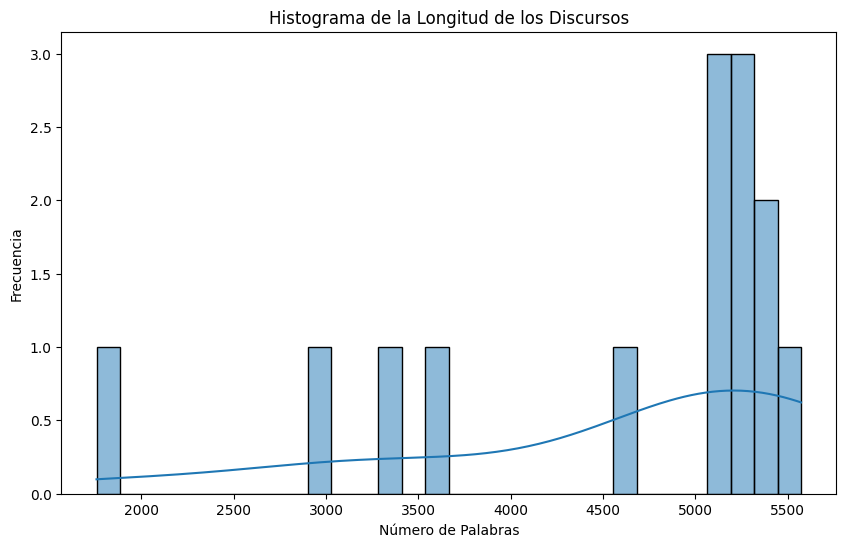

2024-01-01 22:44:44,034 - INFO - 
04_NER_Basic.ipynb...
2024-01-01 22:44:45,836 - INFO - Modelo spaCy 'es_core_news_lg' ya está instalado.
2024-01-01 22:44:46,983 - INFO - Cargando datos de oraciones desde Excel...
2024-01-01 22:44:47,254 - INFO - Realizando NER en las oraciones...
2024-01-01 22:45:02,105 - INFO - Agrupando entidades similares...
d:\TFM_Project\PLN_Project\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
2024-01-01 22:45:02,411 - INFO - Guardando datos de entidades en Excel...
2024-01-01 22:45:02,716 - INFO - DataFrame guardado en d:\TFM_Project\PLN_Project\data\xlsx\ner_entity.xlsx
2024-01-01 22:45:02,719 - INFO - _BERT_Analysis.ipynb...
Some weights of the model checkpoint at mrm8488/bert-spanish-cased-finetuned-ner were not used when initializing BertForTokenClas

Procesando: 0/2802 oraciones (0.00%)
Procesando: 280/2802 oraciones (9.99%)
Entidad 'Instituto Nacional de Donación y Trasplante de  Tejidos' no encontrada en el texto.
Entidad 's Solidarias del Ministerio de Educación  de Educación Inicial' no encontrada en el texto.
Entidad 'San  de Miraflores' no encontrada en el texto.
Entidad 'San  de Miraflores' no encontrada en el texto.
Procesando: 560/2802 oraciones (19.99%)
Entidad 'aciones Público - Privadas' no encontrada en el texto.
Procesando: 840/2802 oraciones (29.98%)
Entidad 'Pro - Empleo' no encontrada en el texto.
Procesando: 1120/2802 oraciones (39.97%)
Procesando: 1400/2802 oraciones (49.96%)
Procesando: 1680/2802 oraciones (59.96%)
Entidad 'Acuerdo Binacional Perú  Bolivia' no encontrada en el texto.
Entidad 'Sistema Integrado de Transporte de Gas  Sur del Perú' no encontrada en el texto.
Procesando: 1960/2802 oraciones (69.95%)
Entidad 'Aeropuerto Internacional  Chávez' no encontrada en el texto.
Procesando: 2240/2802 oraciones

2024-01-01 22:48:01,449 - INFO - Agrupando entidades similares...


Procesamiento completado.


d:\TFM_Project\PLN_Project\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
2024-01-01 22:48:01,668 - INFO - Guardando datos de entidades BERT en Excel...
2024-01-01 22:48:02,043 - INFO - DataFrame guardado en d:\TFM_Project\PLN_Project\data\xlsx\bert_entity.xlsx
2024-01-01 22:48:02,049 - INFO - _RoBERTa_Analysis.ipynb...


Exception: File `'./04_NER06_RoBERTa_AnalysisBasic.ipynb'` not found.

In [1]:
# 09_Visualization.ipynb

In [ ]:
# Instalaciones requeridas
# pip install nbformat
pip install pandas mysql-connector-python


In [11]:
# Importar las bibliotecas necesarias
import pandas as pd
import os
import sys

notebook_dir = os.path.dirname(os.path.abspath("__file__"))
project_root = os.path.dirname(notebook_dir)
if project_root not in sys.path:
    sys.path.insert(0, project_root)


from config import XLSX_DIRECTORY, CSV_DIRECTORY


from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader
import torch

# Cargar el modelo preentrenado y el tokenizador
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased")


data_path = os.path.join(XLSX_DIRECTORY, "data.csv")
data = pd.read_csv(data_path)


# Asumimos que tienes una columna 'texto' en tu DataFrame que contiene los textos a analizar
textos = data["topico"]


# Tokenizar los textos
inputs = tokenizer(textos.tolist(), padding=True, truncation=True, return_tensors="pt")

# Crear un DataLoader para gestionar los lotes de textos
data_loader = DataLoader(inputs, batch_size=32)

# Clasificar los textos
model.eval()
with torch.no_grad():
    for batch in data_loader:
        outputs = model(**batch)
        predictions = torch.argmax(outputs.logits, dim=-1)
        # Aquí, 'predictions' contiene los índices de los tópicos predichos para cada texto

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


KeyError: 'Invalid key. Only three types of key are available: (1) string, (2) integers for backend Encoding, and (3) slices for data subsetting.'

In [12]:
# Importar las bibliotecas necesarias
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification
import os
import sys

notebook_dir = os.path.dirname(os.path.abspath("__file__"))
project_root = os.path.dirname(notebook_dir)
if project_root not in sys.path:
    sys.path.insert(0, project_root)


from config import XLSX_DIRECTORY, CSV_DIRECTORY


# Definición de la clase del conjunto de datos
class TextDataset(Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}

    def __len__(self):
        return len(self.encodings["input_ids"])


# Cargar el modelo preentrenado y el tokenizador
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased")

# Cargar los datos
data_path = os.path.join(XLSX_DIRECTORY, "data.csv")
data = pd.read_csv(data_path)


# Asumimos que tienes una columna 'texto' en tu DataFrame que contiene los textos a analizar
textos = data["topico"]

# Tokenizar los textos
inputs = tokenizer(textos.tolist(), padding=True, truncation=True, return_tensors="pt")

# Crear un conjunto de datos de PyTorch y luego un DataLoader
dataset = TextDataset(inputs)
data_loader = DataLoader(dataset, batch_size=32)

# Clasificar los textos
model.eval()
with torch.no_grad():
    for batch in data_loader:
        outputs = model(**{k: v.to(model.device) for k, v in batch.items()})
        predictions = torch.argmax(outputs.logits, dim=-1)
        # Aquí, 'predictions' contiene los índices de los tópicos predichos para cada texto

# Imprimir las predicciones
print(predictions)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\User\AppData\Local\Temp\ipykernel_19280\3966852823.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


tensor([1, 1, 1, 1, 1, 1, 1, 1])


In [8]:
# Importar las bibliotecas necesarias
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification
import os
import sys

notebook_dir = os.path.dirname(os.path.abspath("__file__"))
project_root = os.path.dirname(notebook_dir)
if project_root not in sys.path:
    sys.path.insert(0, project_root)


from config import XLSX_DIRECTORY, CSV_DIRECTORY

# Cargar los datos
data_path = os.path.join(XLSX_DIRECTORY, "data.csv")
data = pd.read_csv(data_path)


# Asumimos que tienes una columna 'texto' en tu DataFrame que contiene los textos a analizar
textos = data["topico"]


def interpretar_topico(palabras):
    # Definir algunas palabras clave para diferentes temas
    temas = {
        "Economía y Finanzas": [
            "economía",
            "finanzas",
            "inversión",
            "millones",
            "soles",
            "dólares",
            "fiscal",
            "impuestos",
            "crecimiento económico",
            "inflación",
            "deuda",
            "mercado",
            "comercio",
            "exportación",
            "importación",
        ],
        "Desarrollo Social y Salud": [
            "salud",
            "educación",
            "desarrollo social",
            "seguridad social",
            "pobreza",
            "desigualdad",
            "empleo",
            "trabajo",
            "becas",
            "reforma educativa",
            "hospitales",
            "atención médica",
            "seguro",
            "bienestar",
        ],
        "Infraestructura y Urbanismo": [
            "infraestructura",
            "urbanismo",
            "construcción",
            "transporte",
            "carreteras",
            "puentes",
            "vivienda",
            "desarrollo urbano",
            "obras públicas",
            "saneamiento",
            "agua potable",
        ],
        "Agricultura y Recursos Naturales": [
            "agricultura",
            "recursos naturales",
            "campo",
            "cultivos",
            "ganadería",
            "forestal",
            "minerales",
            "sostenibilidad",
            "medio ambiente",
            "biodiversidad",
            "agua",
            "tierra",
            "conservación",
        ],
        "Política y Gobierno": [
            "política",
            "gobierno",
            "democracia",
            "elecciones",
            "partidos políticos",
            "legislación",
            "congreso",
            "senado",
            "justicia",
            "derechos humanos",
            "transparencia",
            "corrupción",
            "seguridad",
            "defensa",
        ],
        "Relaciones Internacionales": [
            "relaciones internacionales",
            "diplomacia",
            "tratados",
            "cooperación internacional",
            "integración regional",
            "organismos internacionales",
            "conflictos",
            "ayuda exterior",
            "alianzas",
            "comercio exterior",
        ],
        "Problemas Sociales y Culturales": [
            "problemas sociales",
            "cultura",
            "tradición",
            "identidad",
            "migración",
            "minorías",
            "indígenas",
            "diversidad",
            "inclusión",
            "derechos",
            "movimientos sociales",
            "activismo",
        ],
        "Cuestiones de Género y Equidad": [
            "igualdad de género",
            "empoderamiento de la mujer",
            "violencia de género",
            "derechos de la mujer",
            "diversidad de género",
        ],
        "Tecnología e Innovación": [
            "tecnología",
            "innovación",
            "digitalización",
            "internet",
            "ciberseguridad",
            "startups",
            "telecomunicaciones",
        ],
        "Cambio Climático y Medio Ambiente": [
            "cambio climático",
            "calentamiento global",
            "emisiones",
            "energías renovables",
            "conservación del medio ambiente",
            "contaminación",
        ],
        "Salud Pública y Pandemias": [
            "salud pública",
            "pandemia",
            "COVID-19",
            "vacunación",
            "prevención de enfermedades",
            "sistema de salud",
        ],
        "Derechos Humanos y Libertades Civiles": [
            "derechos humanos",
            "libertades civiles",
            "justicia social",
            "libertad de expresión",
            "derechos civiles",
        ],
        "Economía Digital y Comercio Electrónico": [
            "economía digital",
            "comercio electrónico",
            "negocios en línea",
            "plataformas digitales",
            "e-commerce",
        ],
        "Desarrollo Regional y Local": [
            "desarrollo local",
            "desarrollo regional",
            "gobiernos locales",
            "municipios",
            "descentralización",
        ],
        "Juventud y Educación": [
            "juventud",
            "jóvenes",
            "educación superior",
            "innovación educativa",
            "empleo juvenil",
            "activismo juvenil",
        ],
        "Cultura y Turismo": [
            "cultura",
            "patrimonio cultural",
            "turismo",
            "artes",
            "festivales",
            "sitios turísticos",
        ],
        "Energía y Recursos": [
            "energía",
            "recursos naturales",
            "petróleo",
            "gas",
            "minería",
            "energías limpias",
            "sostenibilidad energética",
        ],
        # Añade más temas y palabras clave según sea necesario
    }

    # Contar cuántas palabras clave de cada tema aparecen en el tópico
    conteo_temas = {
        tema: sum(palabra in palabras for palabra in palabras_clave)
        for tema, palabras_clave in temas.items()
    }

    # Determinar el tema con mayor número de coincidencias de palabras clave
    tema_interpretado = max(conteo_temas, key=conteo_temas.get)

    return tema_interpretado


# Ejemplo de uso de la función
# palabras_topico = ["millones", "soles", "beca", "salud", "desarrollo"]  # Reemplaza esto con tu lista de palabras
# palabras_topico = textos
# tema = interpretar_topico(palabras_topico)
# print(f"El tópico interpretado es: {tema}")

# Iterar a través de las entradas en 'topico' y calcular el tema interpretado para cada una
# Agrupar las palabras clave por "topico"
grupos_topicos = data.groupby("topico")["palabras"].apply(list)

# Iterar a través de los grupos y calcular el tema interpretado para cada grupo de palabras
for topico, palabras_grupo in grupos_topicos.items():
    tema_interpretado = interpretar_topico(palabras_grupo)
    print(f"El tópico interpretado para {topico} es: {tema_interpretado}")

El tópico interpretado para Topico_1 es: Economía y Finanzas
El tópico interpretado para Topico_10 es: Política y Gobierno
El tópico interpretado para Topico_2 es: Economía y Finanzas
El tópico interpretado para Topico_3 es: Economía y Finanzas
El tópico interpretado para Topico_4 es: Economía y Finanzas
El tópico interpretado para Topico_5 es: Economía y Finanzas
El tópico interpretado para Topico_6 es: Desarrollo Social y Salud
El tópico interpretado para Topico_7 es: Economía y Finanzas
El tópico interpretado para Topico_8 es: Economía y Finanzas
El tópico interpretado para Topico_9 es: Economía y Finanzas


In [7]:
# Importar las bibliotecas necesarias
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification
import os
import sys
import random


notebook_dir = os.path.dirname(os.path.abspath("__file__"))
project_root = os.path.dirname(notebook_dir)
if project_root not in sys.path:
    sys.path.insert(0, project_root)


from config import XLSX_DIRECTORY, CSV_DIRECTORY

# Cargar los datos
data_path = os.path.join(XLSX_DIRECTORY, "data.csv")
data = pd.read_csv(data_path)


# Asumimos que tienes una columna 'texto' en tu DataFrame que contiene los textos a analizar
textos = data["topico"]


def interpretar_topico(palabras, porcentajes):
    # Definir algunas palabras clave para diferentes temas
    temas = {
        "Economía y Finanzas": [
            "economía",
            "finanzas",
            "inversión",
            "millones",
            "soles",
            "dólares",
            "fiscal",
            "impuestos",
            "crecimiento económico",
            "inflación",
            "deuda",
            "mercado",
            "comercio",
            "exportación",
            "importación",
        ],
        "Desarrollo Social y Salud": [
            "salud",
            "educación",
            "desarrollo social",
            "seguridad social",
            "pobreza",
            "desigualdad",
            "empleo",
            "trabajo",
            "becas",
            "reforma educativa",
            "hospitales",
            "atención médica",
            "seguro",
            "bienestar",
        ],
        "Infraestructura y Urbanismo": [
            "infraestructura",
            "urbanismo",
            "construcción",
            "transporte",
            "carreteras",
            "puentes",
            "vivienda",
            "desarrollo urbano",
            "obras públicas",
            "saneamiento",
            "agua potable",
        ],
        "Agricultura y Recursos Naturales": [
            "agricultura",
            "recursos naturales",
            "campo",
            "cultivos",
            "ganadería",
            "forestal",
            "minerales",
            "sostenibilidad",
            "medio ambiente",
            "biodiversidad",
            "agua",
            "tierra",
            "conservación",
        ],
        "Política y Gobierno": [
            "política",
            "gobierno",
            "democracia",
            "elecciones",
            "partidos políticos",
            "legislación",
            "congreso",
            "senado",
            "justicia",
            "derechos humanos",
            "transparencia",
            "corrupción",
            "seguridad",
            "defensa",
        ],
        "Relaciones Internacionales": [
            "relaciones internacionales",
            "diplomacia",
            "tratados",
            "cooperación internacional",
            "integración regional",
            "organismos internacionales",
            "conflictos",
            "ayuda exterior",
            "alianzas",
            "comercio exterior",
        ],
        "Problemas Sociales y Culturales": [
            "problemas sociales",
            "cultura",
            "tradición",
            "identidad",
            "migración",
            "minorías",
            "indígenas",
            "diversidad",
            "inclusión",
            "derechos",
            "movimientos sociales",
            "activismo",
        ],
        "Cuestiones de Género y Equidad": [
            "igualdad de género",
            "empoderamiento de la mujer",
            "violencia de género",
            "derechos de la mujer",
            "diversidad de género",
        ],
        "Tecnología e Innovación": [
            "tecnología",
            "innovación",
            "digitalización",
            "internet",
            "ciberseguridad",
            "startups",
            "telecomunicaciones",
        ],
        "Cambio Climático y Medio Ambiente": [
            "cambio climático",
            "calentamiento global",
            "emisiones",
            "energías renovables",
            "conservación del medio ambiente",
            "contaminación",
        ],
        "Salud Pública y Pandemias": [
            "salud pública",
            "pandemia",
            "COVID-19",
            "vacunación",
            "prevención de enfermedades",
            "sistema de salud",
        ],
        "Derechos Humanos y Libertades Civiles": [
            "derechos humanos",
            "libertades civiles",
            "justicia social",
            "libertad de expresión",
            "derechos civiles",
        ],
        "Economía Digital y Comercio Electrónico": [
            "economía digital",
            "comercio electrónico",
            "negocios en línea",
            "plataformas digitales",
            "e-commerce",
        ],
        "Desarrollo Regional y Local": [
            "desarrollo local",
            "desarrollo regional",
            "gobiernos locales",
            "municipios",
            "descentralización",
        ],
        "Juventud y Educación": [
            "juventud",
            "jóvenes",
            "educación superior",
            "innovación educativa",
            "empleo juvenil",
            "activismo juvenil",
        ],
        "Cultura y Turismo": [
            "cultura",
            "patrimonio cultural",
            "turismo",
            "artes",
            "festivales",
            "sitios turísticos",
        ],
        "Energía y Recursos": [
            "energía",
            "recursos naturales",
            "petróleo",
            "gas",
            "minería",
            "energías limpias",
            "sostenibilidad energética",
        ],
        # Añade más temas y palabras clave según sea necesario
    }

    # Crear una lista de temas con porcentajes basados en los porcentajes
    temas_con_probabilidades = [
        (tema, porcentaje)
        for tema, palabras_clave in temas.items()
        for porcentaje in porcentajes
        if any(palabra in palabras_clave for palabra in palabras)
    ]

    # Si no se encontraron temas, retornar None
    if not temas_con_probabilidades:
        return None

    # Calcular las probabilidades en base a los porcentajes
    total_porcentajes = sum(
        probabilidad for _, probabilidad in temas_con_probabilidades
    )
    probabilidades_normalizadas = [
        (tema, probabilidad / total_porcentajes)
        for tema, probabilidad in temas_con_probabilidades
    ]

    # Ordenar los temas por probabilidad descendente
    temas_ordenados = sorted(
        probabilidades_normalizadas, key=lambda x: x[1], reverse=True
    )

    return temas_ordenados


# Iterar a través de los grupos y calcular el tema interpretado para cada grupo de palabras y porcentajes
for topico, grupo in grupos_topicos.iterrows():
    palabras_grupo = grupo["palabras"]
    porcentajes_grupo = grupo["Suma de porcentajes"]
    temas_interpretados = interpretar_topico(palabras_grupo, porcentajes_grupo)
    if temas_interpretados:
        print(f"Interpretación del {topico}:")
        # Mostrar solo los tres temas principales
        for tema, porcentaje in temas_interpretados[:3]:
            print(f"{tema}: {porcentaje * 100:.2f}%")
        print()  # Agregar un salto de línea
    else:
        print(f"No se encontraron temas para {topico}")

Interpretación del Topico_1:
Economía y Finanzas: 1.93%
Desarrollo Social y Salud: 1.93%
Agricultura y Recursos Naturales: 1.93%

Interpretación del Topico_10:
Economía y Finanzas: 3.21%
Desarrollo Social y Salud: 3.21%
Política y Gobierno: 3.21%

Interpretación del Topico_2:
Economía y Finanzas: 4.04%
Infraestructura y Urbanismo: 4.04%
Política y Gobierno: 4.04%

Interpretación del Topico_3:
Economía y Finanzas: 5.57%
Desarrollo Social y Salud: 5.57%
Política y Gobierno: 5.57%

Interpretación del Topico_4:
Economía y Finanzas: 6.17%
Desarrollo Social y Salud: 6.17%
Política y Gobierno: 6.17%

Interpretación del Topico_5:
Economía y Finanzas: 2.26%
Desarrollo Social y Salud: 2.26%
Infraestructura y Urbanismo: 2.26%

Interpretación del Topico_6:
Desarrollo Social y Salud: 2.95%
Infraestructura y Urbanismo: 2.95%
Política y Gobierno: 2.95%

Interpretación del Topico_7:
Economía y Finanzas: 2.63%
Desarrollo Social y Salud: 2.63%
Infraestructura y Urbanismo: 2.63%

Interpretación del Topic

In [38]:
# Importar las bibliotecas necesarias
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification
import os
import sys
import random


notebook_dir = os.path.dirname(os.path.abspath("__file__"))
project_root = os.path.dirname(notebook_dir)
if project_root not in sys.path:
    sys.path.insert(0, project_root)


from config import XLSX_DIRECTORY, CSV_DIRECTORY

# Cargar los datos
data_path = os.path.join(XLSX_DIRECTORY, "data.csv")
data = pd.read_csv(data_path)


# Asumimos que tienes una columna 'texto' en tu DataFrame que contiene los textos a analizar
textos = data["topico"]


temas = {
    "Economía y Finanzas": ["economía", "inversión", "fiscal", "impuestos", "mercado"],
    "Salud y Desarrollo Social": [
        "salud",
        "educación",
        "seguridad social",
        "bienestar",
        "pobreza",
    ],
    "Infraestructura y Urbanismo": [
        "infraestructura",
        "transporte",
        "vivienda",
        "obras públicas",
    ],
    "Agricultura y Medio Ambiente": [
        "agricultura",
        "recursos naturales",
        "sostenibilidad",
        "medio ambiente",
        "conservación",
    ],
    "Política y Gobierno": [
        "política",
        "democracia",
        "elecciones",
        "legislación",
        "derechos humanos",
    ],
    "Relaciones Internacionales": [
        "diplomacia",
        "cooperación internacional",
        "comercio exterior",
    ],
    "Cultura y Sociedad": [
        "cultura",
        "tradición",
        "diversidad",
        "derechos civiles",
        "activismo",
    ],
    "Tecnología e Innovación": [
        "tecnología",
        "digitalización",
        "internet",
        "ciberseguridad",
    ],
    "Energía y Recursos": ["energía", "recursos naturales", "energías limpias"],
    # ... otros temas según sea necesario
}

ponderaciones = {
    # Ponderaciones para "Economía y Finanzas"
    "economía": 1.2,
    "inversión": 1.1,
    "fiscal": 1.0,
    "impuestos": 1.0,
    "mercado": 0.9,
    # Ponderaciones para "Salud y Desarrollo Social"
    "salud": 1.2,
    "educación": 1.1,
    "seguridad social": 1.0,
    "bienestar": 1.0,
    "pobreza": 0.9,
    # Ponderaciones para "Infraestructura y Urbanismo"
    "infraestructura": 1.2,
    "transporte": 1.1,
    "vivienda": 1.0,
    "obras públicas": 1.0,
    # Ponderaciones para "Agricultura y Medio Ambiente"
    "agricultura": 1.2,
    "recursos naturales": 1.1,
    "sostenibilidad": 1.0,
    "medio ambiente": 1.0,
    "conservación": 0.9,
    # Ponderaciones para "Política y Gobierno"
    "política": 1.2,
    "democracia": 1.1,
    "elecciones": 1.0,
    "legislación": 1.0,
    "derechos humanos": 1.0,
    # Ponderaciones para "Relaciones Internacionales"
    "diplomacia": 1.2,
    "cooperación internacional": 1.1,
    "comercio exterior": 1.0,
    # Ponderaciones para "Cultura y Sociedad"
    "cultura": 1.2,
    "tradición": 1.1,
    "diversidad": 1.0,
    "derechos civiles": 1.0,
    "activismo": 0.9,
    # Ponderaciones para "Tecnología e Innovación"
    "tecnología": 1.2,
    "digitalización": 1.1,
    "internet": 1.0,
    "ciberseguridad": 1.0,
    # Ponderaciones para "Energía y Recursos"
    "energía": 1.2,
    "recursos naturales": 1.1,
    "energías limpias": 1.0,
}




def interpretar_topico(palabras, porcentajes):
    temas_con_probabilidades = []

    for tema, palabras_clave in temas.items():
        # Calcular la puntuación del tema en función de las palabras clave y sus ponderaciones
        puntuacion_tema = sum(
            ponderaciones.get(palabra, 1) * porcentaje
            for palabra, porcentaje in zip(palabras, porcentajes)
            if palabra in palabras_clave
        )

        if puntuacion_tema > 0:
            temas_con_probabilidades.append((tema, puntuacion_tema))

    # Normalizar las puntuaciones
    total_puntuacion = sum(puntuacion for _, puntuacion in temas_con_probabilidades)
    temas_con_probabilidades = [
        (tema, puntuacion / total_puntuacion)
        for tema, puntuacion in temas_con_probabilidades
    ]

    # Ordenar los temas por puntuación
    temas_ordenados = sorted(temas_con_probabilidades, key=lambda x: x[1], reverse=True)

    return temas_ordenados

# Crear un DataFrame 'grupos_topicos' a partir de la columna 'topico'
grupos_topicos = data.groupby('topico').apply(lambda x: pd.Series({
    'palabras': list(x['palabras']),
    'Suma de porcentajes': list(x['Suma de porcentajes'])
}))

resultados_data = []

# Iterar a través de los grupos y almacenar los resultados en una lista
for topico, grupo in grupos_topicos.iterrows():
    palabras_grupo = grupo['palabras']
    porcentajes_grupo = grupo['Suma de porcentajes']
    temas_interpretados = interpretar_topico(palabras_grupo, porcentajes_grupo)

    if temas_interpretados:
        print(f"Interpretación del {topico}:")
        for tema, porcentaje in temas_interpretados[:3]:  # Considerar los tres temas principales
            print(f"{tema}: {porcentaje * 100:.2f}%")
            resultados_data.append({'Topico': topico, 'Tema': tema, 'Ponderación': porcentaje * 100})
    else:
        resultados_data.append({'Topico': topico, 'Tema': 'No identificado', 'Ponderación': 0})
        print(f"No se encontraron temas para {topico}")

# Crear el DataFrame a partir de la lista acumulada
resultados = pd.DataFrame(resultados_data)
        
# Calcular la frecuencia y ponderación acumulativa de cada tema
temas_agregados = resultados.groupby('Tema').agg({'Ponderación': 'sum', 'Topico': 'count'}).rename(columns={'Topico': 'Frecuencia'})
temas_agregados = temas_agregados.sort_values(by='Ponderación', ascending=False)

# Crear un resumen destacando los temas principales
resumen = "Temas principales del discurso:\n"
for tema, datos in temas_agregados.iterrows():
    if tema != 'No identificado':
        resumen += f"- {tema}: mencionado {datos['Frecuencia']} veces con una ponderación total de {datos['Ponderación']:.2f}%\n"

print(resumen)

Interpretación del Topico_1:
Salud y Desarrollo Social: 35.63%
Economía y Finanzas: 33.51%
Política y Gobierno: 30.85%
No se encontraron temas para Topico_10
Interpretación del Topico_2:
Infraestructura y Urbanismo: 52.95%
Economía y Finanzas: 47.05%
Interpretación del Topico_3:
Salud y Desarrollo Social: 100.00%
Interpretación del Topico_4:
Salud y Desarrollo Social: 100.00%
Interpretación del Topico_5:
Salud y Desarrollo Social: 72.27%
Economía y Finanzas: 27.73%
Interpretación del Topico_6:
Infraestructura y Urbanismo: 41.56%
Salud y Desarrollo Social: 29.91%
Política y Gobierno: 28.53%
Interpretación del Topico_7:
Salud y Desarrollo Social: 40.31%
Economía y Finanzas: 35.43%
Infraestructura y Urbanismo: 24.26%
Interpretación del Topico_8:
Economía y Finanzas: 100.00%
Interpretación del Topico_9:
Infraestructura y Urbanismo: 55.41%
Economía y Finanzas: 44.59%
Temas principales del discurso:
- Salud y Desarrollo Social: mencionado 6.0 veces con una ponderación total de 378.12%
- Econ

In [2]:
pip install pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [13]:
print(pd.__version__)


2.1.4


In [30]:
# Importar las bibliotecas necesarias
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification
import os
import sys
import random


notebook_dir = os.path.dirname(os.path.abspath("__file__"))
project_root = os.path.dirname(notebook_dir)
if project_root not in sys.path:
    sys.path.insert(0, project_root)


from config import XLSX_DIRECTORY, CSV_DIRECTORY

# Cargar los datos
data_path = os.path.join(XLSX_DIRECTORY, "data.csv")
data = pd.read_csv(data_path)


# Asumimos que tienes una columna 'texto' en tu DataFrame que contiene los textos a analizar
textos = data["topico"]


temas = {
    "Economía y Finanzas": ["economía", "inversión", "fiscal", "impuestos", "mercado"],
    "Salud y Desarrollo Social": [
        "salud",
        "educación",
        "seguridad social",
        "bienestar",
        "pobreza",
    ],
    "Infraestructura y Urbanismo": [
        "infraestructura",
        "transporte",
        "vivienda",
        "obras públicas",
    ],
    "Agricultura y Medio Ambiente": [
        "agricultura",
        "recursos naturales",
        "sostenibilidad",
        "medio ambiente",
        "conservación",
    ],
    "Política y Gobierno": [
        "política",
        "democracia",
        "elecciones",
        "legislación",
        "derechos humanos",
    ],
    "Relaciones Internacionales": [
        "diplomacia",
        "cooperación internacional",
        "comercio exterior",
    ],
    "Cultura y Sociedad": [
        "cultura",
        "tradición",
        "diversidad",
        "derechos civiles",
        "activismo",
    ],
    "Tecnología e Innovación": [
        "tecnología",
        "digitalización",
        "internet",
        "ciberseguridad",
    ],
    "Energía y Recursos": ["energía", "recursos naturales", "energías limpias"],
    # ... otros temas según sea necesario
}

ponderaciones = {
    # Ponderaciones para "Economía y Finanzas"
    "economía": 1.2,
    "inversión": 1.1,
    "fiscal": 1.0,
    "impuestos": 1.0,
    "mercado": 0.9,
    # Ponderaciones para "Salud y Desarrollo Social"
    "salud": 1.2,
    "educación": 1.1,
    "seguridad social": 1.0,
    "bienestar": 1.0,
    "pobreza": 0.9,
    # Ponderaciones para "Infraestructura y Urbanismo"
    "infraestructura": 1.2,
    "transporte": 1.1,
    "vivienda": 1.0,
    "obras públicas": 1.0,
    # Ponderaciones para "Agricultura y Medio Ambiente"
    "agricultura": 1.2,
    "recursos naturales": 1.1,
    "sostenibilidad": 1.0,
    "medio ambiente": 1.0,
    "conservación": 0.9,
    # Ponderaciones para "Política y Gobierno"
    "política": 1.2,
    "democracia": 1.1,
    "elecciones": 1.0,
    "legislación": 1.0,
    "derechos humanos": 1.0,
    # Ponderaciones para "Relaciones Internacionales"
    "diplomacia": 1.2,
    "cooperación internacional": 1.1,
    "comercio exterior": 1.0,
    # Ponderaciones para "Cultura y Sociedad"
    "cultura": 1.2,
    "tradición": 1.1,
    "diversidad": 1.0,
    "derechos civiles": 1.0,
    "activismo": 0.9,
    # Ponderaciones para "Tecnología e Innovación"
    "tecnología": 1.2,
    "digitalización": 1.1,
    "internet": 1.0,
    "ciberseguridad": 1.0,
    # Ponderaciones para "Energía y Recursos"
    "energía": 1.2,
    "recursos naturales": 1.1,
    "energías limpias": 1.0,
}



def interpretar_topico(palabras, porcentajes):
    temas_con_probabilidades = {tema: 0 for tema in temas}

    for palabra, porcentaje in zip(palabras, porcentajes):
        temas_posibles = [tema for tema, palabras_clave in temas.items() if palabra in palabras_clave]
        porcentaje_dividido = porcentaje / len(temas_posibles) if temas_posibles else 0

        for tema in temas_posibles:
            # Multiplica por 100 si quieres que la salida esté en porcentaje
            temas_con_probabilidades[tema] += porcentaje_dividido * ponderaciones.get(palabra, 1) * 100

    temas_ordenados = sorted(temas_con_probabilidades.items(), key=lambda x: x[1], reverse=True)
    return temas_ordenados


resultados_data = []


for topico, grupo in grupos_topicos.iterrows():
    palabras_grupo = grupo['palabras']
    porcentajes_grupo = grupo['Suma de porcentajes']
    temas_interpretados = interpretar_topico(palabras_grupo, porcentajes_grupo)

    if temas_interpretados:
        for tema, porcentaje in temas_interpretados[:3]:
            # Asumiendo que porcentajes_grupo ya está en la escala correcta
            resultados_data.append({'Topico': topico, 'Tema': tema, 'Ponderación': porcentaje})

    else:
        resultados_data.append({'Topico': topico, 'Tema': 'No identificado', 'Ponderación': 0})

# Creación del DataFrame y cálculo de los promedios
resultados = pd.DataFrame(resultados_data)
temas_agregados = resultados.groupby('Tema').agg({'Ponderación': 'mean', 'Topico': 'count'}).rename(columns={'Topico': 'Frecuencia'})
temas_agregados = temas_agregados.sort_values(by='Ponderación', ascending=False)

# Crear y mostrar el resumen
resumen = "\nTemas principales del discurso:\n"
for tema, datos in temas_agregados.iterrows():
    if tema != 'No identificado':
        # La ponderación ya está en porcentaje, por lo que no es necesario multiplicar por 100
        resumen += f"- {tema}: mencionado {datos['Frecuencia']} veces con una ponderación promedio de {datos['Ponderación']:.2f}%\n"
print(resumen)


Temas principales del discurso:
- Política y Gobierno: mencionado 2.0 veces con una ponderación promedio de 0.39%
- Salud y Desarrollo Social: mencionado 10.0 veces con una ponderación promedio de 0.39%
- Economía y Finanzas: mencionado 9.0 veces con una ponderación promedio de 0.38%
- Infraestructura y Urbanismo: mencionado 9.0 veces con una ponderación promedio de 0.21%



In [41]:
# Importar las bibliotecas necesarias
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification
import os
import sys
import random


notebook_dir = os.path.dirname(os.path.abspath("__file__"))
project_root = os.path.dirname(notebook_dir)
if project_root not in sys.path:
    sys.path.insert(0, project_root)


from config import XLSX_DIRECTORY, CSV_DIRECTORY

# Cargar los datos
data_path = os.path.join(XLSX_DIRECTORY, "data.csv")
data = pd.read_csv(data_path)


# Asumimos que tienes una columna 'texto' en tu DataFrame que contiene los textos a analizar
textos = data["topico"]


temas = {
    "Economía y Finanzas": ["economía", "inversión", "fiscal", "impuestos", "mercado"],
    "Salud y Desarrollo Social": [
        "salud",
        "educación",
        "seguridad social",
        "bienestar",
        "pobreza",
    ],
    "Infraestructura y Urbanismo": [
        "infraestructura",
        "transporte",
        "vivienda",
        "obras públicas",
    ],
    "Agricultura y Medio Ambiente": [
        "agricultura",
        "recursos naturales",
        "sostenibilidad",
        "medio ambiente",
        "conservación",
    ],
    "Política y Gobierno": [
        "política",
        "democracia",
        "elecciones",
        "legislación",
        "derechos humanos",
    ],
    "Relaciones Internacionales": [
        "diplomacia",
        "cooperación internacional",
        "comercio exterior",
    ],
    "Cultura y Sociedad": [
        "cultura",
        "tradición",
        "diversidad",
        "derechos civiles",
        "activismo",
    ],
    "Tecnología e Innovación": [
        "tecnología",
        "digitalización",
        "internet",
        "ciberseguridad",
    ],
    "Energía y Recursos": ["energía", "recursos naturales", "energías limpias"],
    # ... otros temas según sea necesario
}

ponderaciones = {
    # Ponderaciones para "Economía y Finanzas"
    "economía": 1.2,
    "inversión": 1.1,
    "fiscal": 1.0,
    "impuestos": 1.0,
    "mercado": 0.9,
    # Ponderaciones para "Salud y Desarrollo Social"
    "salud": 1.2,
    "educación": 1.1,
    "seguridad social": 1.0,
    "bienestar": 1.0,
    "pobreza": 0.9,
    # Ponderaciones para "Infraestructura y Urbanismo"
    "infraestructura": 1.2,
    "transporte": 1.1,
    "vivienda": 1.0,
    "obras públicas": 1.0,
    # Ponderaciones para "Agricultura y Medio Ambiente"
    "agricultura": 1.2,
    "recursos naturales": 1.1,
    "sostenibilidad": 1.0,
    "medio ambiente": 1.0,
    "conservación": 0.9,
    # Ponderaciones para "Política y Gobierno"
    "política": 1.2,
    "democracia": 1.1,
    "elecciones": 1.0,
    "legislación": 1.0,
    "derechos humanos": 1.0,
    # Ponderaciones para "Relaciones Internacionales"
    "diplomacia": 1.2,
    "cooperación internacional": 1.1,
    "comercio exterior": 1.0,
    # Ponderaciones para "Cultura y Sociedad"
    "cultura": 1.2,
    "tradición": 1.1,
    "diversidad": 1.0,
    "derechos civiles": 1.0,
    "activismo": 0.9,
    # Ponderaciones para "Tecnología e Innovación"
    "tecnología": 1.2,
    "digitalización": 1.1,
    "internet": 1.0,
    "ciberseguridad": 1.0,
    # Ponderaciones para "Energía y Recursos"
    "energía": 1.2,
    "recursos naturales": 1.1,
    "energías limpias": 1.0,
}




def interpretar_topico(palabras, porcentajes):
    temas_con_probabilidades = {tema: 0 for tema in temas}

    for palabra, porcentaje in zip(palabras, porcentajes):
        for tema, palabras_clave in temas.items():
            if palabra in palabras_clave:
                # Asigna el porcentaje completo a cada tema relevante
                temas_con_probabilidades[tema] += porcentaje

    temas_ordenados = sorted(temas_con_probabilidades.items(), key=lambda x: x[1], reverse=True)
    return temas_ordenados



# Crear un DataFrame 'grupos_topicos' a partir de la columna 'topico'
grupos_topicos = data.groupby('topico').apply(lambda x: pd.Series({
    'palabras': list(x['palabras']),
    'Suma de porcentajes': list(x['Suma de porcentajes'])
}))

resultados_data = []

# Iterar a través de los grupos y almacenar los resultados en una lista
for topico, grupo in grupos_topicos.iterrows():
    palabras_grupo = grupo['palabras']
    porcentajes_grupo = grupo['Suma de porcentajes']
    temas_interpretados = interpretar_topico(palabras_grupo, porcentajes_grupo)

    if temas_interpretados:
        print(f"Interpretación del {topico}:")
        for tema, porcentaje in temas_interpretados[:3]:  # Considerar los tres temas principales
            print(f"{tema}: {porcentaje * 100:.2f}%")
            resultados_data.append({'Topico': topico, 'Tema': tema, 'Ponderación': porcentaje * 100})
    else:
        resultados_data.append({'Topico': topico, 'Tema': 'No identificado', 'Ponderación': 0})
        print(f"No se encontraron temas para {topico}")

        
# Crear el DataFrame y calcular el promedio de las ponderaciones
resultados = pd.DataFrame(resultados_data)

# Usa la suma en lugar del promedio para calcular la importancia general de cada tema
temas_agregados = resultados.groupby('Tema').agg({'Ponderación': 'sum', 'Topico': 'count'}).rename(columns={'Topico': 'Frecuencia'})
temas_agregados = temas_agregados.sort_values(by='Ponderación', ascending=False)

resumen = "\nTemas principales del discurso:\n"
for tema, datos in temas_agregados.iterrows():
    resumen += f"- {tema}: mencionado {datos['Frecuencia']} veces con una ponderación total de {datos['Ponderación']:.2f}%\n"

print(resumen)

Interpretación del Topico_1:
Economía y Finanzas: 0.43%
Salud y Desarrollo Social: 0.42%
Política y Gobierno: 0.37%
Interpretación del Topico_10:
Economía y Finanzas: 0.00%
Salud y Desarrollo Social: 0.00%
Infraestructura y Urbanismo: 0.00%
Interpretación del Topico_2:
Infraestructura y Urbanismo: 0.42%
Economía y Finanzas: 0.41%
Salud y Desarrollo Social: 0.00%
Interpretación del Topico_3:
Salud y Desarrollo Social: 0.26%
Economía y Finanzas: 0.00%
Infraestructura y Urbanismo: 0.00%
Interpretación del Topico_4:
Salud y Desarrollo Social: 0.57%
Economía y Finanzas: 0.00%
Infraestructura y Urbanismo: 0.00%
Interpretación del Topico_5:
Salud y Desarrollo Social: 1.10%
Economía y Finanzas: 0.44%
Infraestructura y Urbanismo: 0.00%
Interpretación del Topico_6:
Infraestructura y Urbanismo: 0.41%
Salud y Desarrollo Social: 0.30%
Política y Gobierno: 0.28%
Interpretación del Topico_7:
Salud y Desarrollo Social: 0.60%
Economía y Finanzas: 0.58%
Infraestructura y Urbanismo: 0.36%
Interpretación 

In [42]:
# Importar las bibliotecas necesarias
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification
import os
import sys
import random


notebook_dir = os.path.dirname(os.path.abspath("__file__"))
project_root = os.path.dirname(notebook_dir)
if project_root not in sys.path:
    sys.path.insert(0, project_root)


from config import XLSX_DIRECTORY, CSV_DIRECTORY

# Cargar los datos
data_path = os.path.join(XLSX_DIRECTORY, "data.csv")
data = pd.read_csv(data_path)


# Asumimos que tienes una columna 'texto' en tu DataFrame que contiene los textos a analizar
textos = data["topico"]


temas = {
    "Economía y Finanzas": ["economía", "inversión", "fiscal", "impuestos", "mercado"],
    "Salud y Desarrollo Social": [
        "salud",
        "educación",
        "seguridad social",
        "bienestar",
        "pobreza",
    ],
    "Infraestructura y Urbanismo": [
        "infraestructura",
        "transporte",
        "vivienda",
        "obras públicas",
    ],
    "Agricultura y Medio Ambiente": [
        "agricultura",
        "recursos naturales",
        "sostenibilidad",
        "medio ambiente",
        "conservación",
    ],
    "Política y Gobierno": [
        "política",
        "democracia",
        "elecciones",
        "legislación",
        "derechos humanos",
    ],
    "Relaciones Internacionales": [
        "diplomacia",
        "cooperación internacional",
        "comercio exterior",
    ],
    "Cultura y Sociedad": [
        "cultura",
        "tradición",
        "diversidad",
        "derechos civiles",
        "activismo",
    ],
    "Tecnología e Innovación": [
        "tecnología",
        "digitalización",
        "internet",
        "ciberseguridad",
    ],
    "Energía y Recursos": ["energía", "recursos naturales", "energías limpias"],
    # ... otros temas según sea necesario
}

ponderaciones = {
    # Ponderaciones para "Economía y Finanzas"
    "economía": 1.2,
    "inversión": 1.1,
    "fiscal": 1.0,
    "impuestos": 1.0,
    "mercado": 0.9,
    # Ponderaciones para "Salud y Desarrollo Social"
    "salud": 1.2,
    "educación": 1.1,
    "seguridad social": 1.0,
    "bienestar": 1.0,
    "pobreza": 0.9,
    # Ponderaciones para "Infraestructura y Urbanismo"
    "infraestructura": 1.2,
    "transporte": 1.1,
    "vivienda": 1.0,
    "obras públicas": 1.0,
    # Ponderaciones para "Agricultura y Medio Ambiente"
    "agricultura": 1.2,
    "recursos naturales": 1.1,
    "sostenibilidad": 1.0,
    "medio ambiente": 1.0,
    "conservación": 0.9,
    # Ponderaciones para "Política y Gobierno"
    "política": 1.2,
    "democracia": 1.1,
    "elecciones": 1.0,
    "legislación": 1.0,
    "derechos humanos": 1.0,
    # Ponderaciones para "Relaciones Internacionales"
    "diplomacia": 1.2,
    "cooperación internacional": 1.1,
    "comercio exterior": 1.0,
    # Ponderaciones para "Cultura y Sociedad"
    "cultura": 1.2,
    "tradición": 1.1,
    "diversidad": 1.0,
    "derechos civiles": 1.0,
    "activismo": 0.9,
    # Ponderaciones para "Tecnología e Innovación"
    "tecnología": 1.2,
    "digitalización": 1.1,
    "internet": 1.0,
    "ciberseguridad": 1.0,
    # Ponderaciones para "Energía y Recursos"
    "energía": 1.2,
    "recursos naturales": 1.1,
    "energías limpias": 1.0,
}



def interpretar_topico(palabras, porcentajes):
    temas_con_probabilidades = {tema: 0 for tema in temas}

    for palabra, porcentaje in zip(palabras, porcentajes):
        temas_relevantes = [tema for tema, palabras_clave in temas.items() if palabra in palabras_clave]

        # Dividir la ponderación entre los temas relevantes
        porcentaje_dividido = porcentaje / len(temas_relevantes) if temas_relevantes else 0

        for tema in temas_relevantes:
            temas_con_probabilidades[tema] += porcentaje_dividido

    temas_ordenados = sorted(temas_con_probabilidades.items(), key=lambda x: x[1], reverse=True)
    return temas_ordenados




# Crear un DataFrame 'grupos_topicos' a partir de la columna 'topico'
grupos_topicos = data.groupby('topico').apply(lambda x: pd.Series({
    'palabras': list(x['palabras']),
    'Suma de porcentajes': list(x['Suma de porcentajes'])
}))

resultados_data = []

# Iterar a través de los grupos y almacenar los resultados en una lista
for topico, grupo in grupos_topicos.iterrows():
    palabras_grupo = grupo['palabras']
    porcentajes_grupo = grupo['Suma de porcentajes']
    temas_interpretados = interpretar_topico(palabras_grupo, porcentajes_grupo)

    if temas_interpretados:
        print(f"Interpretación del {topico}:")
        for tema, porcentaje in temas_interpretados[:3]:  # Considerar los tres temas principales
            print(f"{tema}: {porcentaje * 100:.2f}%")
            resultados_data.append({'Topico': topico, 'Tema': tema, 'Ponderación': porcentaje * 100})
    else:
        resultados_data.append({'Topico': topico, 'Tema': 'No identificado', 'Ponderación': 0})
        print(f"No se encontraron temas para {topico}")

        
# Crear el DataFrame y calcular el promedio de las ponderaciones
resultados = pd.DataFrame(resultados_data)

# Usa la suma en lugar del promedio para calcular la importancia general de cada tema
temas_agregados = resultados.groupby('Tema').agg({'Ponderación': 'sum', 'Topico': 'count'}).rename(columns={'Topico': 'Frecuencia'})
temas_agregados = temas_agregados.sort_values(by='Ponderación', ascending=False)

resumen = "\nTemas principales del discurso:\n"
for tema, datos in temas_agregados.iterrows():
    resumen += f"- {tema}: mencionado {datos['Frecuencia']} veces con una ponderación total de {datos['Ponderación']:.2f}%\n"

print(resumen)

Interpretación del Topico_1:
Economía y Finanzas: 0.43%
Salud y Desarrollo Social: 0.42%
Política y Gobierno: 0.37%
Interpretación del Topico_10:
Economía y Finanzas: 0.00%
Salud y Desarrollo Social: 0.00%
Infraestructura y Urbanismo: 0.00%
Interpretación del Topico_2:
Infraestructura y Urbanismo: 0.42%
Economía y Finanzas: 0.41%
Salud y Desarrollo Social: 0.00%
Interpretación del Topico_3:
Salud y Desarrollo Social: 0.26%
Economía y Finanzas: 0.00%
Infraestructura y Urbanismo: 0.00%
Interpretación del Topico_4:
Salud y Desarrollo Social: 0.57%
Economía y Finanzas: 0.00%
Infraestructura y Urbanismo: 0.00%
Interpretación del Topico_5:
Salud y Desarrollo Social: 1.10%
Economía y Finanzas: 0.44%
Infraestructura y Urbanismo: 0.00%
Interpretación del Topico_6:
Infraestructura y Urbanismo: 0.41%
Salud y Desarrollo Social: 0.30%
Política y Gobierno: 0.28%
Interpretación del Topico_7:
Salud y Desarrollo Social: 0.60%
Economía y Finanzas: 0.58%
Infraestructura y Urbanismo: 0.36%
Interpretación 